In [1]:
import sys
!{sys.executable} -m pip install openpyxl -q
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import math
import seaborn as sns
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

In [2]:
viz_path = 'Visualizations/Tree_Rep/'


In [3]:
scen_names = ['AMC','AOC','RSMC','RSOC']
elo_list = ['all','low','medium','high']
color_list = ['tab:green','tab:orange','tab:blue','tab:red']

In [4]:
elo_style_dict = {'all':'solid','high': 'dashdot','medium':'dashed','low': 'dotted'}
color_dict = {}

for index,scen_name in enumerate(scen_names):
    color_dict[scen_name] = color_list[index] 

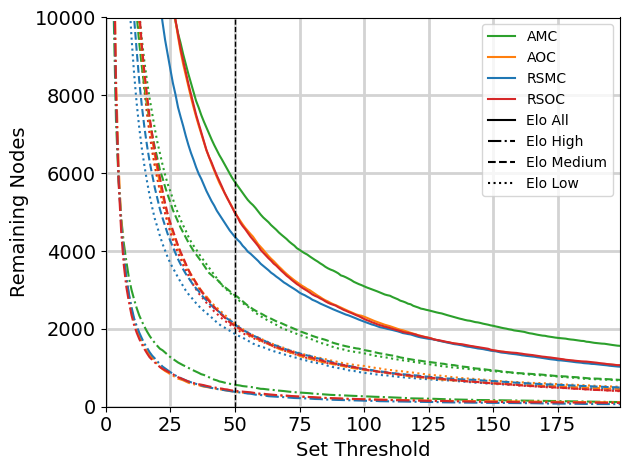

In [5]:
#th plots
elo_class = 'high'

#ocs same result
figure, ax = plt.subplots()
for elo_class in elo_list:
    for scen_name in scen_names:
        
        try:
            with open(f'data/tree_rep/stats/th_{scen_name}_{elo_class}_elo.pkl', 'rb') as f:
                val_list = pickle.load(f)
        except: continue
        
        x_th = val_list[0]
        y_th = val_list[1]
        sns.lineplot(x=x_th,y=y_th,label=scen_name,color = color_dict[scen_name]
                     , linestyle = elo_style_dict[elo_class],legend = False)


x,y=([0],[0])    
lgd_dummy1, = plt.plot(x[0], y[0], color='tab:green', linestyle='solid')
lgd_dummy2, = plt.plot(x[0], y[0], color='tab:orange', linestyle='solid')
lgd_dummy3, = plt.plot(x[0], y[0], color='tab:blue', linestyle='solid')
lgd_dummy4, = plt.plot(x[0], y[0], color='tab:red', linestyle='solid')
lgd_dummy5, = plt.plot(x[0], y[0], color='black', linestyle='solid')
lgd_dummy6, = plt.plot(x[0], y[0], color='black', linestyle='dashdot')
lgd_dummy7, = plt.plot(x[0], y[0], color='black', linestyle='dashed')
lgd_dummy8, = plt.plot(x[0], y[0], color='black', linestyle='dotted')

plt.legend([lgd_dummy1,lgd_dummy2,lgd_dummy3,lgd_dummy4,lgd_dummy5,lgd_dummy6,lgd_dummy7,lgd_dummy8],
           ['AMC','AOC','RSMC','RSOC','Elo All','Elo High','Elo Medium','Elo Low'])


#plt.title('Remaining Nodes per Threshold',fontsize=14)
plt.xlabel("Set Threshold",fontsize=14)
plt.ylabel("Remaining Nodes",fontsize=14)
plt.axvline(50, linestyle='dashed', linewidth=1,color='black')

ax.tick_params(which='minor', length=10, color='grey')  
ax.tick_params(axis='y', which='major', labelsize=14)
ax.tick_params(axis='x', which='major', labelsize=14)
#ax.set_xlim([0, x_th[-1]])
ax.set_ylim([0, 10000])
#ax.xaxis.set_minor_locator(AutoMinorLocator())
#ax.yaxis.set_minor_locator(AutoMinorLocator())  
plt.grid(which = 'major',color='lightgrey', linestyle='-', linewidth=2)

plt.margins(x=0,y=0)
plt.tight_layout()
plt.savefig(viz_path + 'nodes_per_th'+ '.pdf',format='pdf')
plt.show()

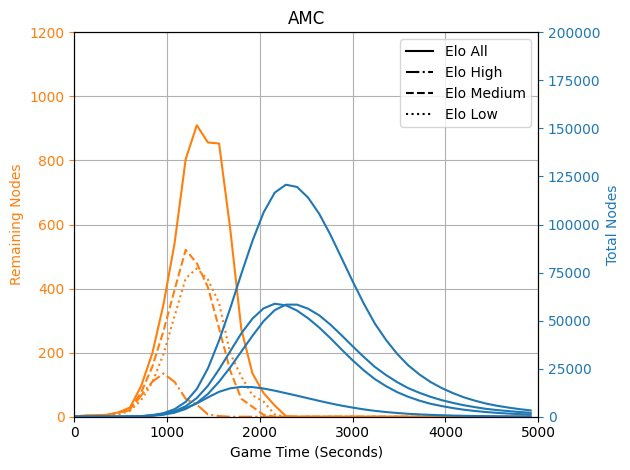

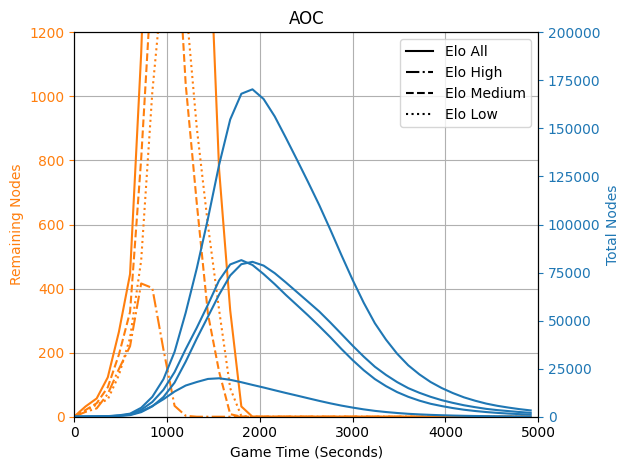

In [6]:
#ocs same result
tf_scens = ["AMC","AOC"]


for scen_name in tf_scens:
    fig,ax1 = plt.subplots()
    ax2 = ax1.twinx()
    for elo_class in elo_list:

        try:
            with open(f'data/tree_rep/stats/slot_node_df{scen_name}_{elo_class}_elo.pkl', 'rb') as f:
                slot_node_df = pickle.load(f)

            with open(f'data/tree_rep/stats/slot_rel_node_df{scen_name}_{elo_class}_elo.pkl', 'rb') as f:
                slot_rel_node_df = pickle.load(f)
        except: continue


        ax2.plot(slot_node_df,color='tab:blue')
        ax1.plot(slot_rel_node_df.iloc[:2000],color='tab:orange',linestyle =elo_style_dict[elo_class])


    lgd_dummy5, = plt.plot(x[0], y[0], color='black', linestyle='solid')
    lgd_dummy6, = plt.plot(x[0], y[0], color='black', linestyle='dashdot')
    lgd_dummy7, = plt.plot(x[0], y[0], color='black', linestyle='dashed')
    lgd_dummy8, = plt.plot(x[0], y[0], color='black', linestyle='dotted')

    plt.legend([lgd_dummy5,lgd_dummy6,lgd_dummy7,lgd_dummy8],
       ['Elo All','Elo High','Elo Medium','Elo Low'])
    ax1.set_ylim(0,1200)
    ax2.set_ylim(0,200000)
    ax1.set_xlim(0,5000)

    ax1.set_ylabel("Remaining Nodes",color='tab:orange')
    ax2.set_ylabel("Total Nodes",color='tab:blue')
    ax1.set_xlabel("Game Time (Seconds)")
    ax1.grid()
    ax1.margins(x=0.00,y=0)
    ax2.margins(x=0.00,y=0)
    plt.title(f'{scen_name}')
    #ax1.set_yticks(ticks=range(0,1400,100), color = 'tab:orange')
    ax1.tick_params(axis='y', colors='tab:orange')
    #ax2.set_yticks(ticks=range(0,200000,20000), color = 'tab:blue')
    ax2.tick_params(axis='y', colors='tab:blue')
    plt.tight_layout()
    #plt.axvline(960, linestyle='dashed', linewidth=1,color='black')
    plt.savefig(viz_path + f'focusslice_{scen_name}'+ '.pdf',format='pdf')
    
    plt.show()

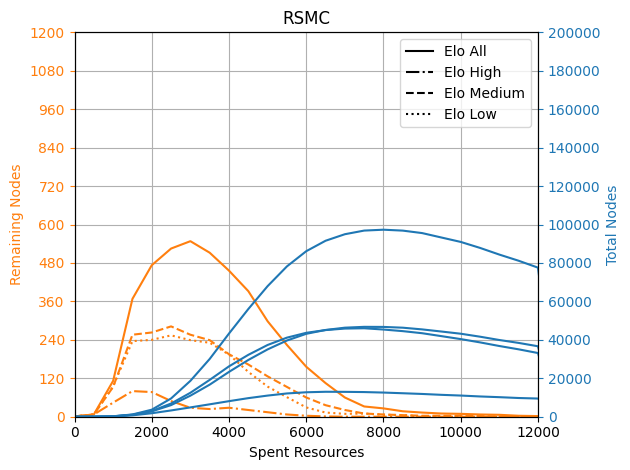

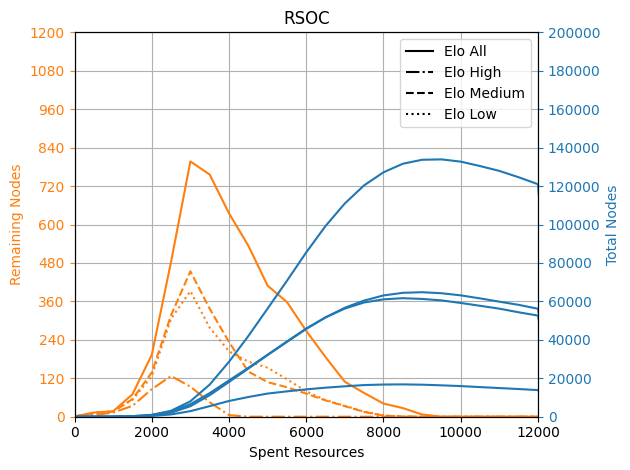

In [7]:
#ocs same result
res_scens = ["RSMC","RSOC"]


for scen_name in res_scens:
    fig,ax1 = plt.subplots()
    ax2 = ax1.twinx()
    for elo_class in elo_list:

        try:
            with open(f'data/tree_rep/stats/slot_node_df{scen_name}_{elo_class}_elo.pkl', 'rb') as f:
                slot_node_df = pickle.load(f)

            with open(f'data/tree_rep/stats/slot_rel_node_df{scen_name}_{elo_class}_elo.pkl', 'rb') as f:
                slot_rel_node_df = pickle.load(f)
        except: continue


        ax2.plot(slot_node_df,color='tab:blue')
        ax1.plot(slot_rel_node_df.iloc[:2000],color='tab:orange',linestyle =elo_style_dict[elo_class])




        
        #plt.xticks(range(0,50,1))
        #plt.axvline(3000, linestyle='dashed', linewidth=1,color='tab:orange')
    #legend
    
    lgd_dummy5, = plt.plot(x[0], y[0], color='black', linestyle='solid')
    lgd_dummy6, = plt.plot(x[0], y[0], color='black', linestyle='dashdot')
    lgd_dummy7, = plt.plot(x[0], y[0], color='black', linestyle='dashed')
    lgd_dummy8, = plt.plot(x[0], y[0], color='black', linestyle='dotted')

    plt.legend([lgd_dummy5,lgd_dummy6,lgd_dummy7,lgd_dummy8],
       ['Elo All','Elo High','Elo Medium','Elo Low'])
    ax1.set_ylim(0,1200)
    ax2.set_ylim(0,200000)
    ax1.set_xlim(0,12000)
    #plt.axvline(3000, linestyle='dashed', linewidth=1,color='black')
    ax1.set_ylabel("Remaining Nodes",color='tab:orange')
    ax2.set_ylabel("Total Nodes",color='tab:blue')
    ax1.set_xlabel("Spent Resources")
    ax1.grid()
    ax1.margins(x=0.00,y=0)
    ax2.margins(x=0.00,y=0)
    plt.title(f'{scen_name}')
    #ax1.set_xticks(ticks=range(0,12001,1000),which='minor')
    ax1.set_yticks(ticks=range(0,1201,120), color = 'tab:orange')
    ax1.tick_params(axis='y', colors='tab:orange')
    ax2.set_yticks(ticks=range(0,200001,20000), color = 'tab:blue')
    ax2.tick_params(axis='y', colors='tab:blue')
    plt.tight_layout()
    plt.savefig(viz_path + f'focusslice_{scen_name}'+ '.pdf',format='pdf')
    
    plt.show()

In [8]:
if False:
    cluster_info_dict ={}

    name = "cluster_dist_boxplot"

    for elo_class in elo_list:

        for scen_name in scen_names:
            scen_name += '_SS'
            
            cluster_info_dict[f'{scen_name}_{elo_class}'] = {}

            try:            
                with open(f'data/tree_rep/stats/cluster_infos_{scen_name}_{elo_class}_elo.pkl', 'rb') as f:
                        this_dict = pickle.load(f)
            except:
                print(scen_name,elo_class, "missing")
                continue
            for key in this_dict:
                cluster_info_dict[f'{scen_name}_{elo_class}_{key}']= {}
                cluster_info_dict[f'{scen_name}_{elo_class}_{key}']['scen_name'] = scen_name
                cluster_info_dict[f'{scen_name}_{elo_class}_{key}']['elo_class'] = elo_class
                for info in this_dict[key]:
                    cluster_info_dict[f'{scen_name}_{elo_class}_{key}'][info] = this_dict[key][info]
            #cluster_info_dict[f'{scen_name}_{elo_class}']

    th_dict = {'AMC':1, 'AOC': 1, 'RSMC':0.2,'RSOC':1}
    th_dict = {'AMC_SS':10, 'AOC_SS': 1, 'RSMC_SS':10.2,'RSOC_SS':1}
    cluster_info_df = pd.DataFrame.from_dict(cluster_info_dict,orient="index")
    print(cluster_info_df.columns)
    #cluster_info_dict[f'{scen_name}_{elo_class}']
    for scen_name in scen_names:
        scen_name += '_SS'
        plt.rcParams["figure.figsize"] = (3,4)
        plt.title(scen_name)

        df = cluster_info_df[cluster_info_df['scen_name']==scen_name]
        df = df[df['avg_intra_dist']<= th_dict[scen_name]]
        sns.boxplot(data=df,x='elo_class',y='avg_intra_dist')
        plt.ylabel("Mean Intra-Cluster Distance")
        plt.xlabel("Elo Rating")
        plt.tight_layout()
        plt.savefig(f'{viz_path}{name}_{scen_name}'+'.pdf',format='pdf')
        plt.show()

In [9]:
if False:
    cluster_info_dict ={}

    name = "cluster_interdist_boxplot"

    for elo_class in elo_list:

        for scen_name in scen_names:
            scen_name += '_SS'
            cluster_info_dict[f'{scen_name}_{elo_class}'] = {}

            try:            
                with open(f'data/tree_rep/stats/cluster_inter_dist_{scen_name}_{elo_class}_elo.pkl', 'rb') as f:
                        this_dict = pickle.load(f)
            except:
                print(scen_name,elo_class, "missing")
                continue
            for key in this_dict:
                cluster_info_dict[f'{scen_name}_{elo_class}_{key}']= {}
                cluster_info_dict[f'{scen_name}_{elo_class}_{key}']['scen_name'] = scen_name
                cluster_info_dict[f'{scen_name}_{elo_class}_{key}']['elo_class'] = elo_class
                for info in this_dict[key]:
                    cluster_info_dict[f'{scen_name}_{elo_class}_{key}'][info] = this_dict[key][info]
            #cluster_info_dict[f'{scen_name}_{elo_class}']


    cluster_info_df = pd.DataFrame.from_dict(cluster_info_dict,orient="index")
    cluster_info_df['weight'] = cluster_info_df['weight']/10000
    cluster_info_df['weight'].astype(int)

    def reindex_df(df, weight_col):
        """expand the dataframe to prepare for resampling
        result is 1 row per count per sample"""
        df = df.reindex(df.index.repeat(df[weight_col]))
        df.reset_index(drop=True, inplace=True)
        return(df)

    th_dict = {'AMC': 0.0002, 'AOC': .00035, 'RSMC':1,'RSOC':1}
    th_dict = {'AMC_SS':10, 'AOC_SS': 10, 'RSMC_SS':10.2,'RSOC_SS':10}
    print(cluster_info_df.columns)
    #cluster_info_dict[f'{scen_name}_{elo_class}']
    for scen_name in scen_names:
        scen_name += '_SS'
        plt.rcParams["figure.figsize"] = (3,4)
        plt.title(scen_name)

        df = cluster_info_df[cluster_info_df['inter_dist']<=th_dict[scen_name]]

        df = df[df['scen_name']==scen_name]
        df = reindex_df(df,'weight')
        sns.boxplot(data=df,x='elo_class',y='inter_dist')
        plt.ylabel("Mean Inter-Cluster Distance")
        plt.xlabel("Elo Rating")
        plt.tight_layout()
        plt.savefig(f'{viz_path}{name}_{scen_name}'+'.pdf',format='pdf')
        plt.show()
        print(df.shape)

In [10]:
#cluster_info_df[cluster_info_df['scen_name']=='RSMC']

AMC


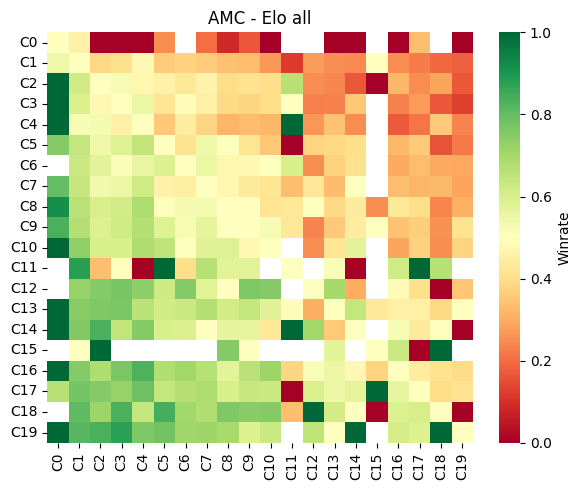

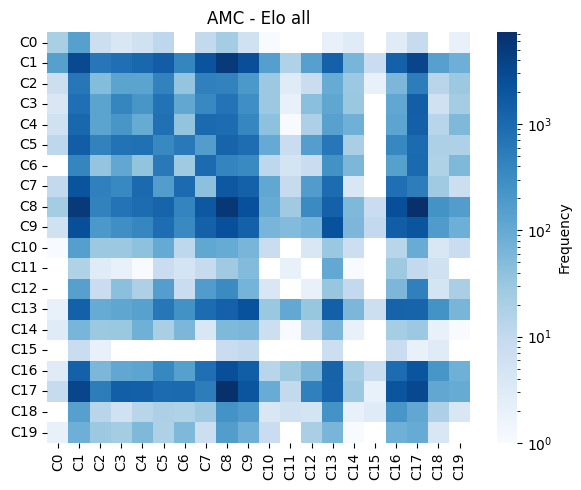

AOC


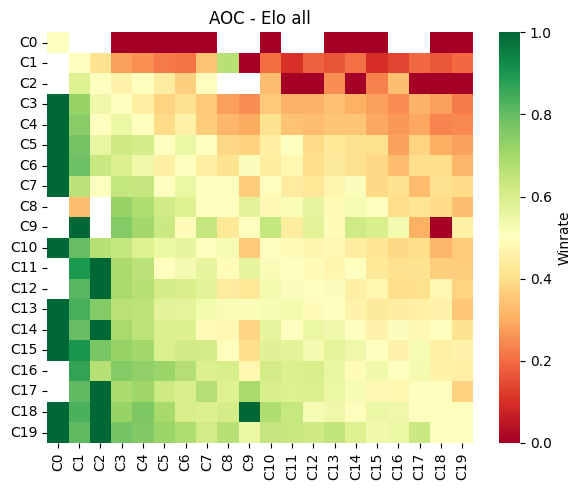

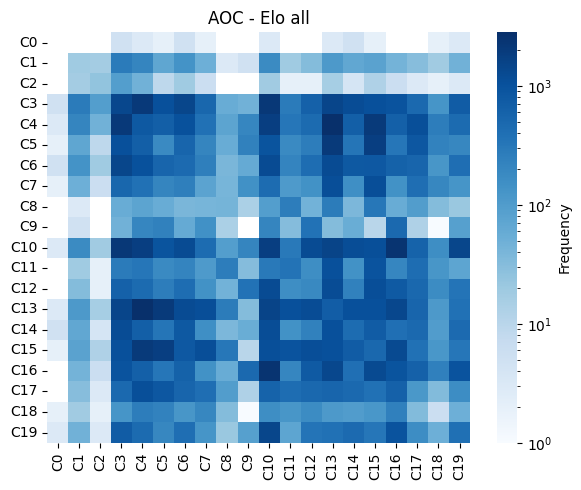

RSMC


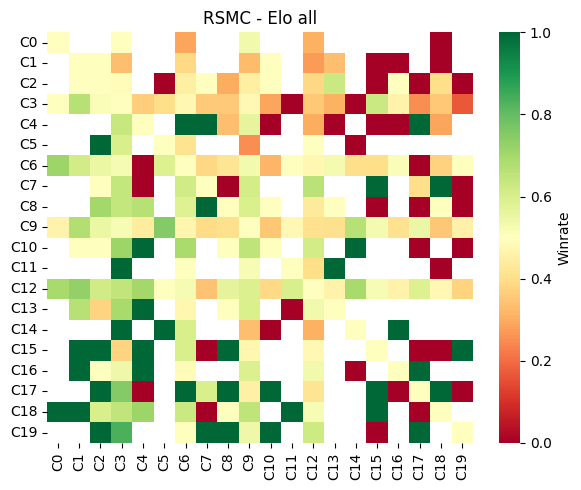

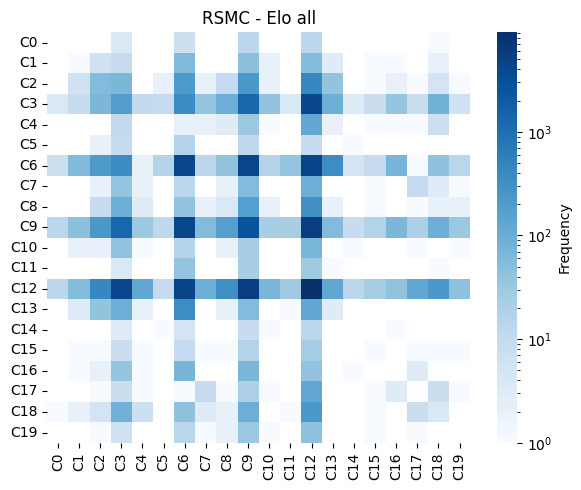

RSOC


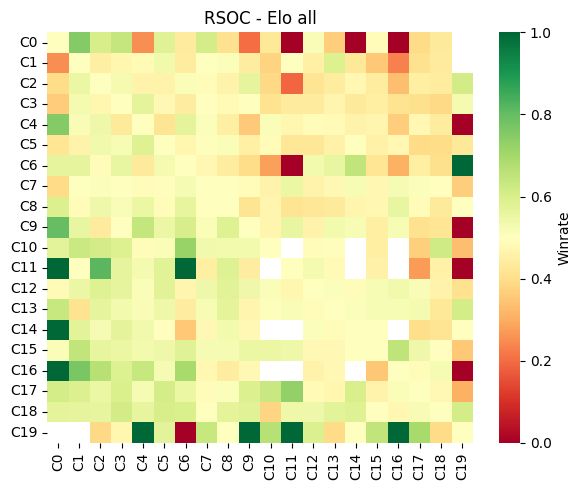

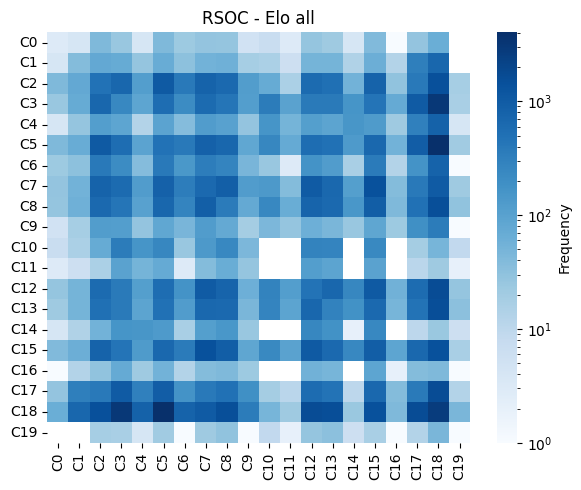

AMC


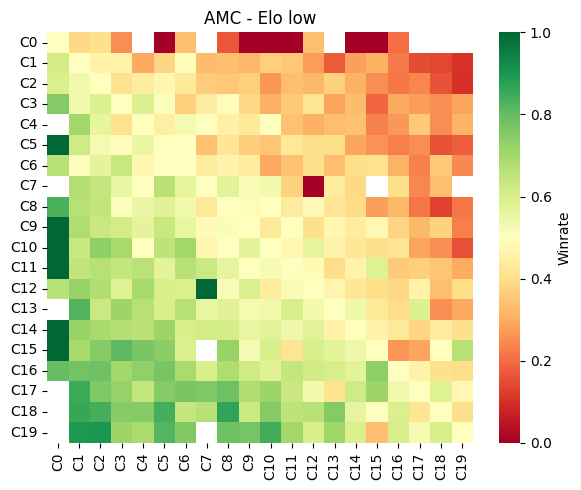

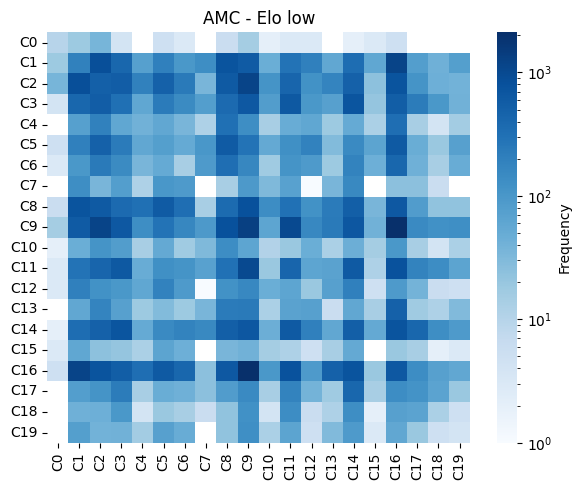

AOC


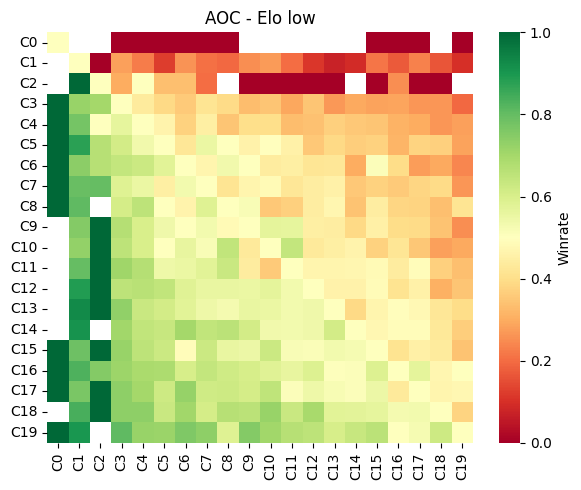

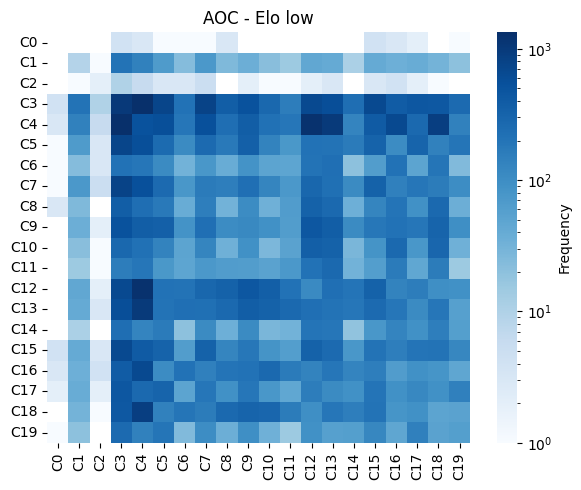

RSMC


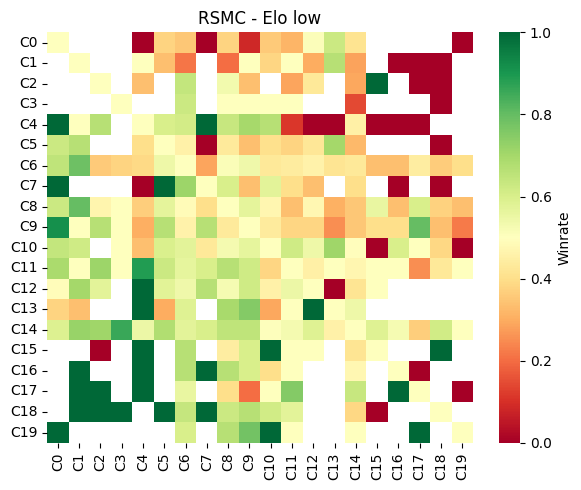

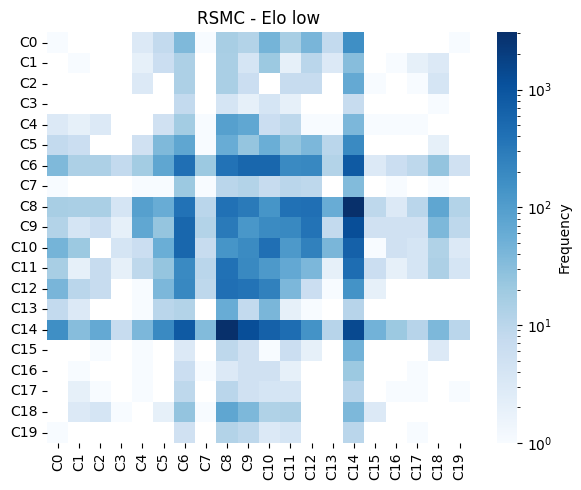

RSOC


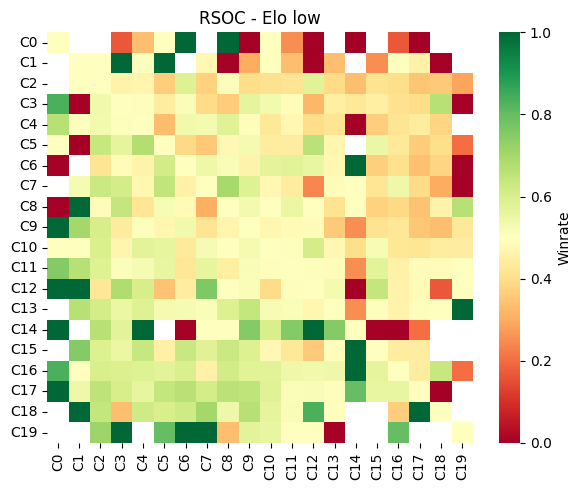

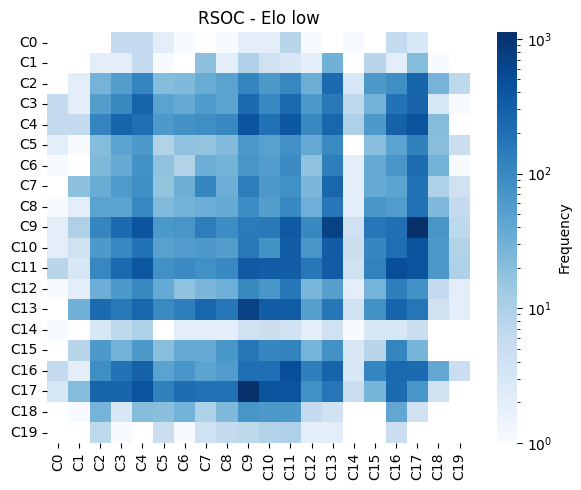

AMC


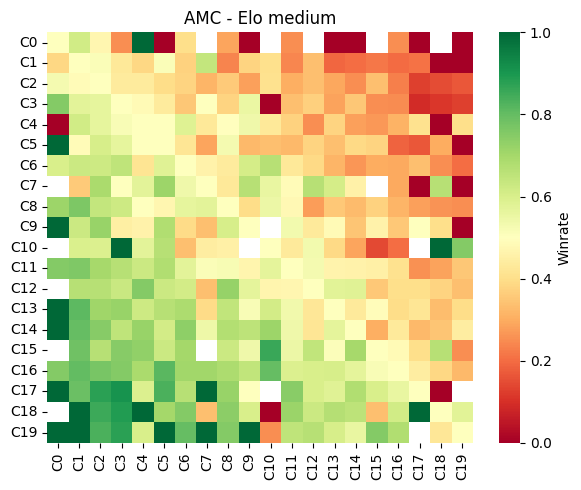

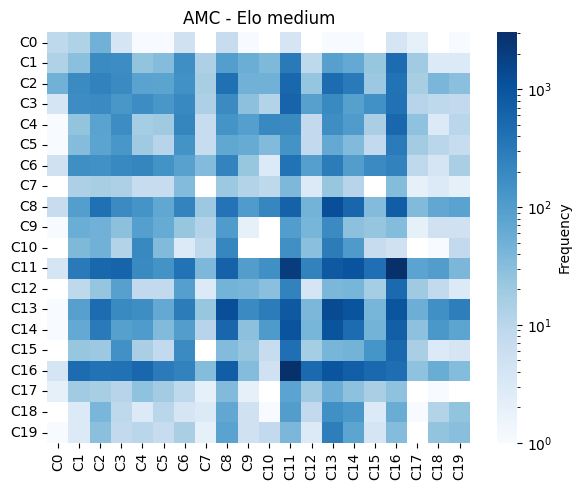

AOC


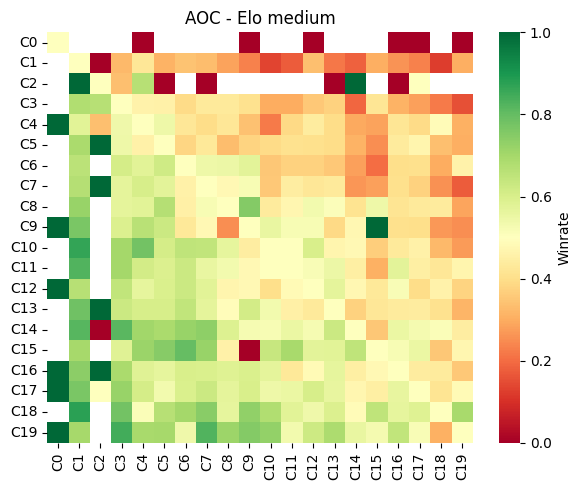

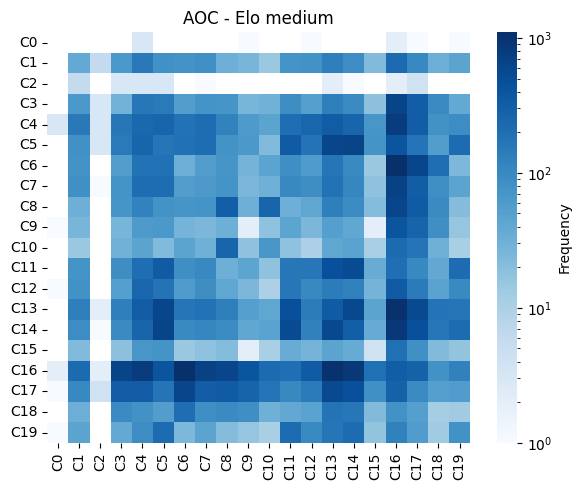

RSMC


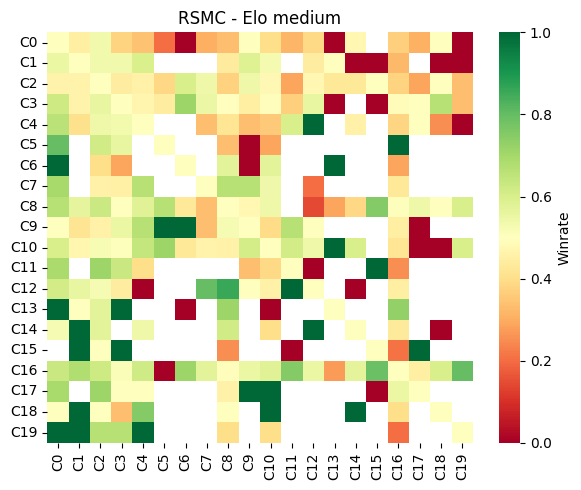

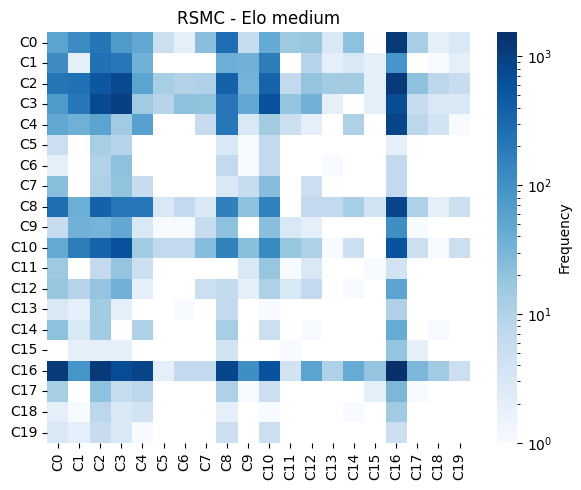

RSOC


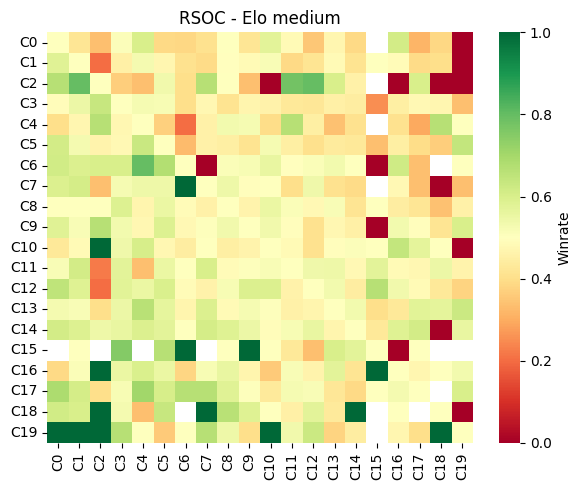

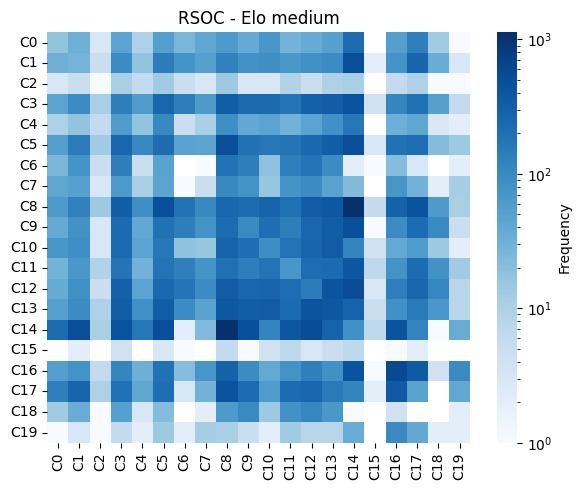

AMC


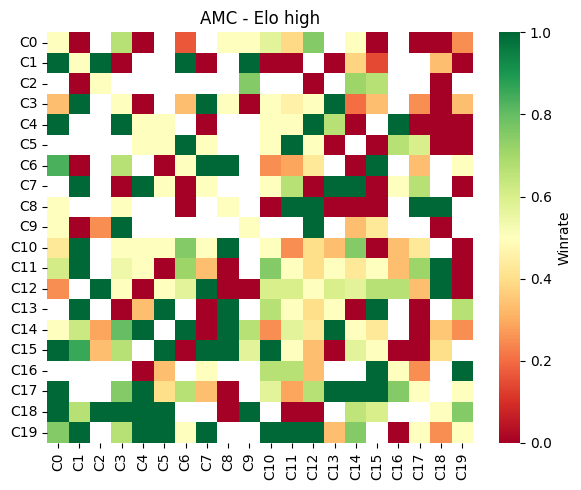

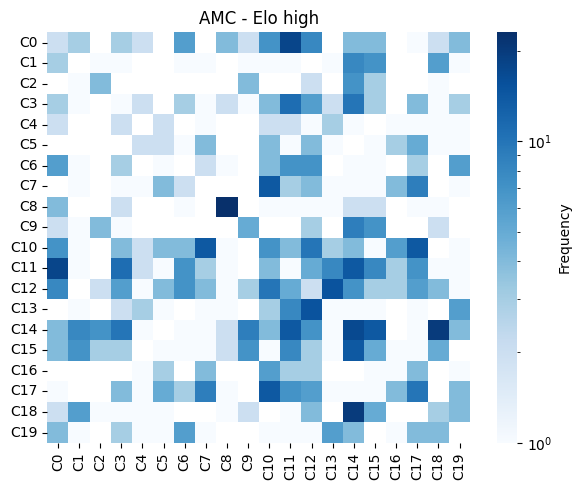

AOC


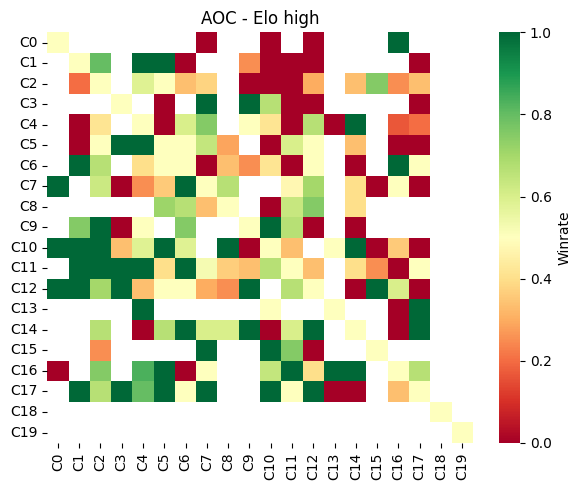

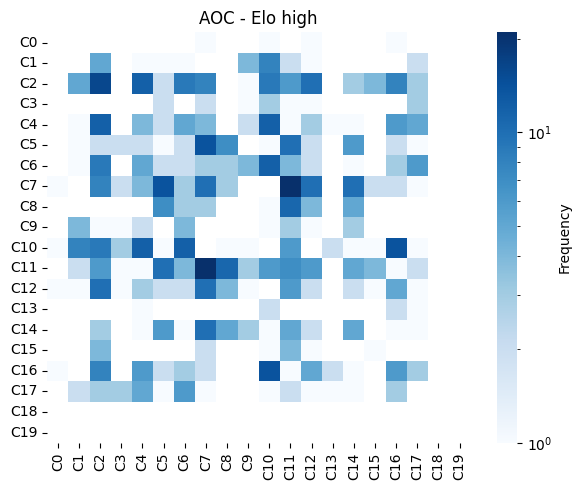

RSMC


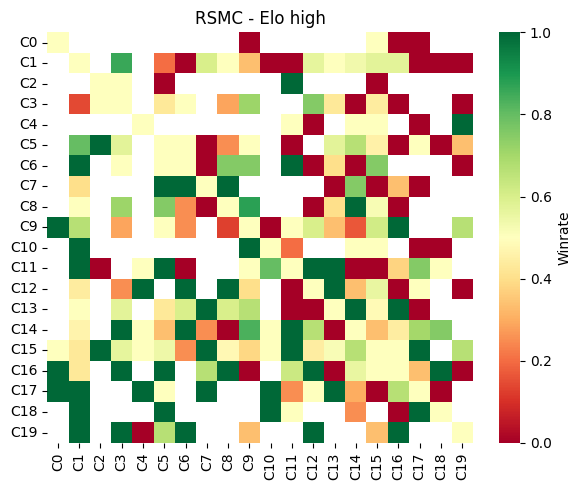

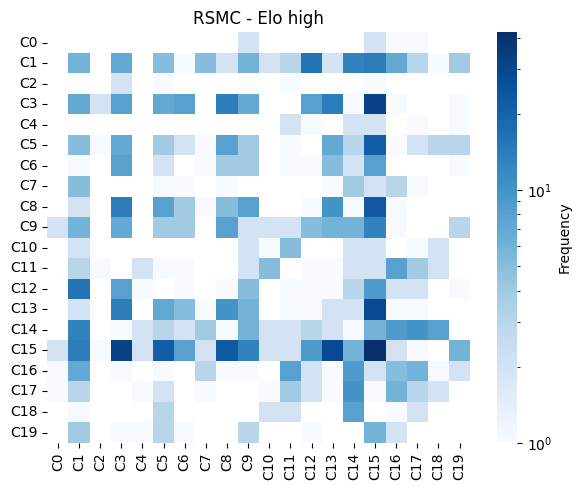

RSOC


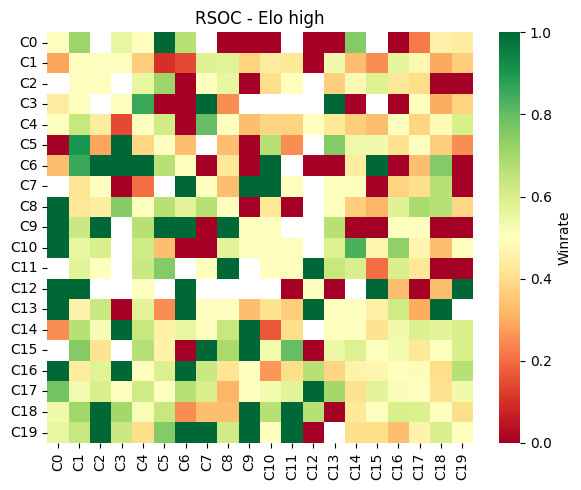

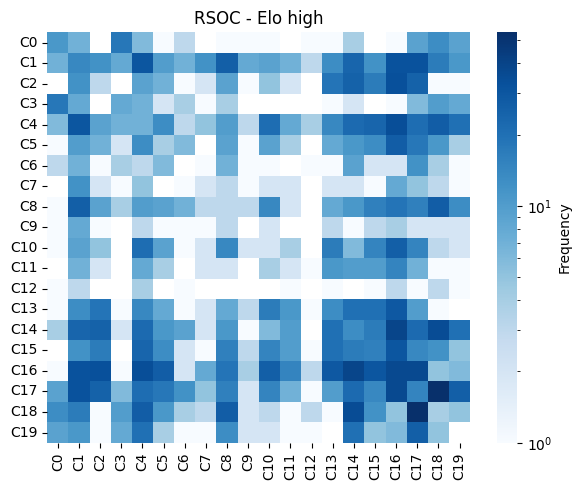

In [11]:
import matplotlib
label_dict = {}

#heatmaps
for elo_class in elo_list:
    label_dict[elo_class] = {}
    for scen_name in scen_names:
        print(scen_name)
        with open(f'data/tree_rep/stats/win_df_{scen_name}_{elo_class}_elo.pkl', 'rb') as f:
            win_df = pickle.load(f)

        with open(f'data/tree_rep/stats/freq_df_{scen_name}_{elo_class}_elo.pkl', 'rb') as f:
                freq_df = pickle.load(f)

        #with open(f'data/tree_rep/stats/dist_df_{scen_name}_{elo_class}_elo.pkl', 'rb') as f:
         #       dist_df = pickle.load(f)

        #try:

        order = win_df.mean().sort_values(ascending=False).index
        win_df = win_df.reindex(order,axis=1)
        win_df = win_df.reindex(order,axis=0)

        for i in range(win_df.shape[0]):
            win_df.iloc[i][i] = 0.5


        label_dict[elo_class][scen_name] = win_df.columns.to_list() 


        plt.rcParams["figure.figsize"] = (6,5)
        sns.heatmap(win_df,cmap = 'RdYlGn',vmin=0,vmax=1, cbar=True,cbar_kws={'label': 'Winrate'})
        plt.yticks([i + 0.5 for i in range(0,win_df.shape[0])],[f'C{i}' for i in range(0,win_df.shape[0])])
        plt.xticks([i + 0.5 for i in range(0,win_df.shape[0])],[f'C{i}' for i in range(0,win_df.shape[0])])
        plt.title(f'{scen_name} - Elo {elo_class}')
        #plt.axis([0,len(civs),0,len(civs)])
        plt.tight_layout()
        name = "cluster_winheatmap"
        plt.savefig(f'{viz_path}{name}_{scen_name}_{elo_class}'+'.pdf',format='pdf')
        plt.show()
        #except:
            #print("error " + scen_name)



        #for index, label in enumerate(label_dict[elo_class][scen_name]):
            #print(f"C{index} : {label}")

        freq_df = freq_df.reindex(order,axis=1)
        freq_df = freq_df.reindex(order,axis=0)
        sns.heatmap(freq_df,cmap = 'Blues',vmin=0,vmax=10000, cbar=True,norm=matplotlib.colors.LogNorm(), cbar_kws={'label': 'Frequency'})
        #plt.axis([0,win_df.shape[0],0,win_df.shape[0]])
        plt.yticks([i + 0.5 for i in range(0,win_df.shape[0])],[f'C{i}' for i in range(0,win_df.shape[0])])
        plt.xticks([i + 0.5 for i in range(0,win_df.shape[0])],[f'C{i}' for i in range(0,win_df.shape[0])])
        plt.title(f'{scen_name} - Elo {elo_class}')
        #plt.axis([0,len(civs),0,len(civs)])
        plt.tight_layout()
        name = "cluster_freqheatmap"
        plt.savefig(f'{viz_path}{name}_{scen_name}_{elo_class}'+'.pdf',format='pdf')
        plt.show()
        """
        dist_df = dist_df.reindex(order,axis=1)
        dist_df = dist_df.reindex(order,axis=0)
        sns.heatmap(dist_df,cmap = 'Purples',vmin=0,vmax=10000, cbar=True,norm=matplotlib.colors.LogNorm(), cbar_kws={'label': 'Frequency'})
        #plt.axis([0,win_df.shape[0],0,win_df.shape[0]])
        plt.yticks([i + 0.5 for i in range(0,dist_df.shape[0])],[f'C{i}' for i in range(0,win_df.shape[0])])
        plt.xticks([i + 0.5 for i in range(0,dist_df.shape[0])],[f'C{i}' for i in range(0,win_df.shape[0])])
        plt.title(f'{scen_name} - Elo {elo_class}')
        #plt.axis([0,len(civs),0,len(civs)])
        plt.tight_layout()
        name = "cluster_distheatmap"
        plt.savefig(f'{viz_path}{name}_{scen_name}_{elo_class}'+'.pdf',format='pdf')
        plt.show()
        """    
            

In [12]:
label_dfs = {}

for elo_class in ['all']:#elo_list:
    for scen_name in scen_names:
        for idx,label in enumerate(label_dict[elo_class][scen_name]):
            label_dfs[f'{scen_name}_{elo_class}_C{idx}'] = {'scen_name':scen_name,
                                                     'elo_class':elo_class,
                                                     'label': f'C{idx}',
                                                     'cluster': label}
label_df = pd.DataFrame.from_dict(label_dfs, orient='index')     

In [13]:
label_df.to_excel(r'labels.xlsx', index = False)